In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils.dataManagers.steward import DataSteward
from utils.dataManagers.informations import informer

ds = DataSteward('mapper_and_most_frequent', 'mean')
column_desc = informer.get_column_descriptions()

train = ds.train_data
test = ds.test_data
ytrain = ds.train_response

In [2]:
categorical = train.select_dtypes(['category'])  
number_type = train.select_dtypes(['int64', 'float64']) 

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


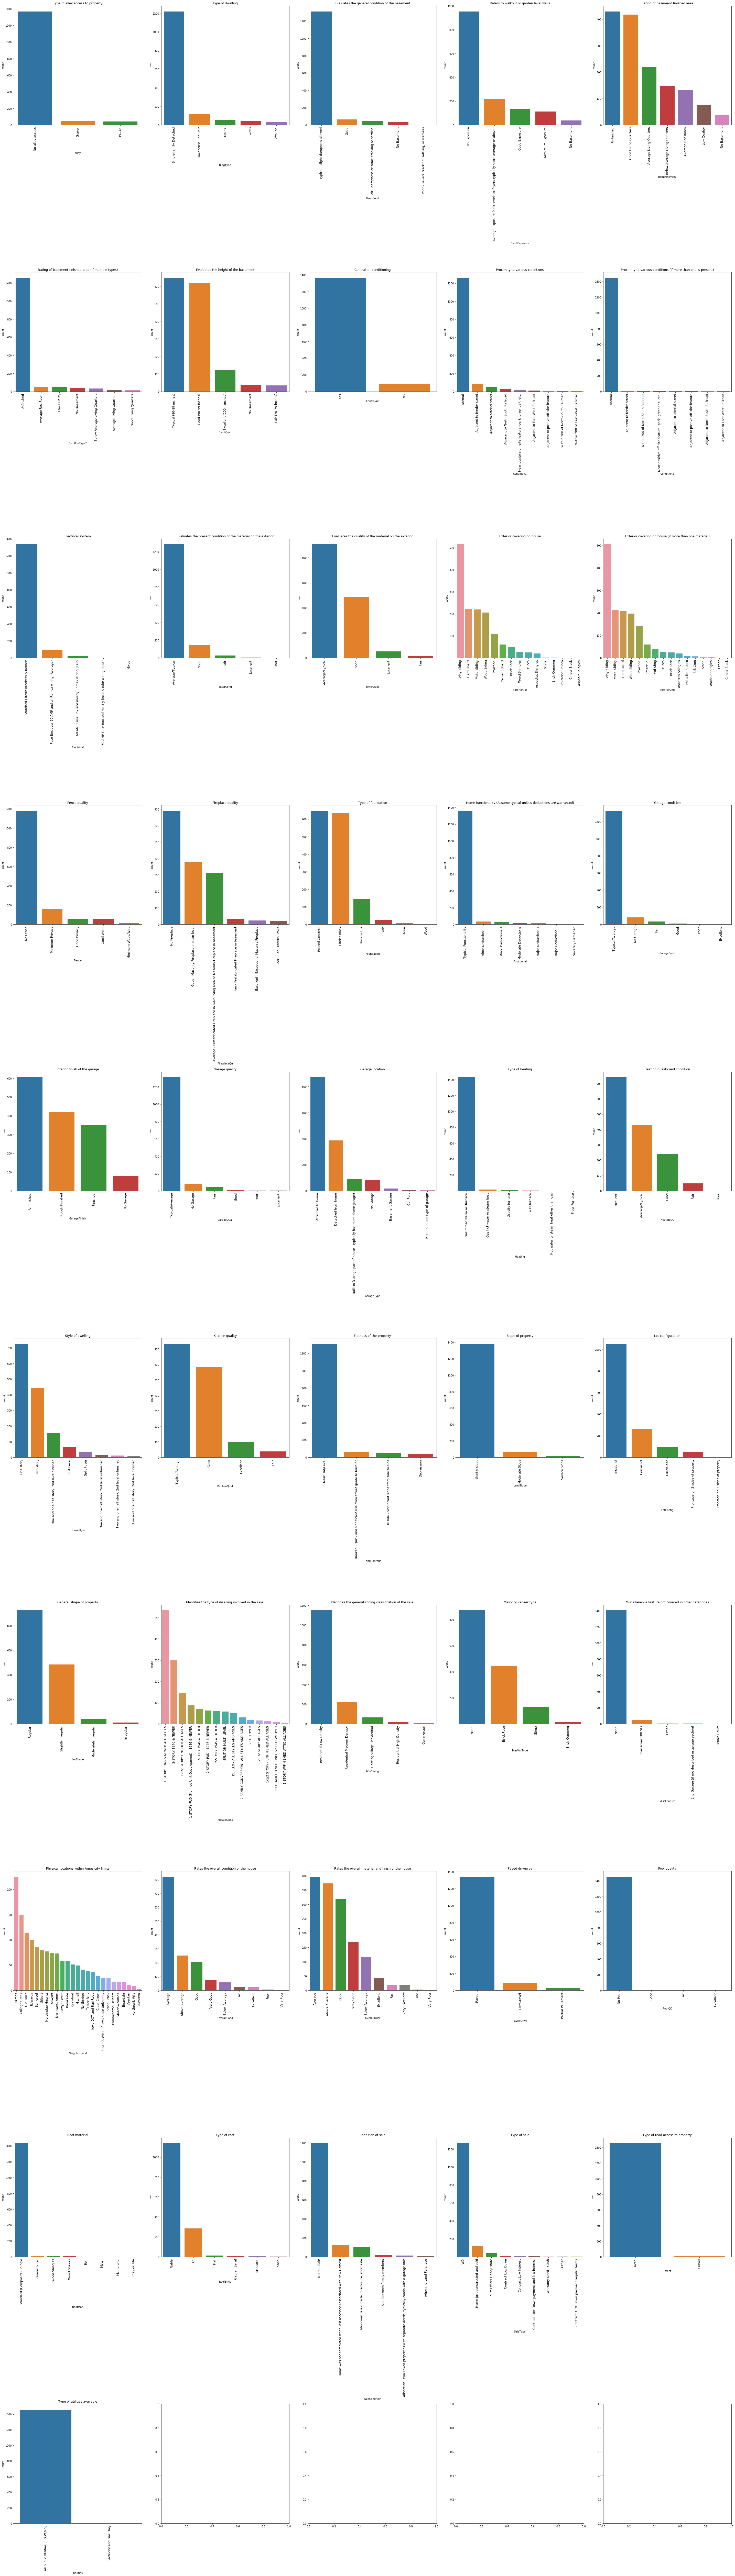

In [30]:
def format_xticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(12) 

def get_list_of_columns_ordered_by_value_counts(series):
    return list(series.value_counts().index)
        
def plot_categoricals(categorical, ncols = 2, figsize_ratio=[8, 14]):
    nrows = math.ceil(categorical.shape[1] / ncols)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows,\
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows),\
                           tight_layout=True)

    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(categorical):
        axes = ax[i]
        sns.countplot(categorical[cat], ax=axes,\
                      order=get_list_of_columns_ordered_by_value_counts(categorical[cat]))
        format_xticks(axes)
        axes.set_title(column_desc[cat])
    
plot_categoricals(categorical, ncols=5)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


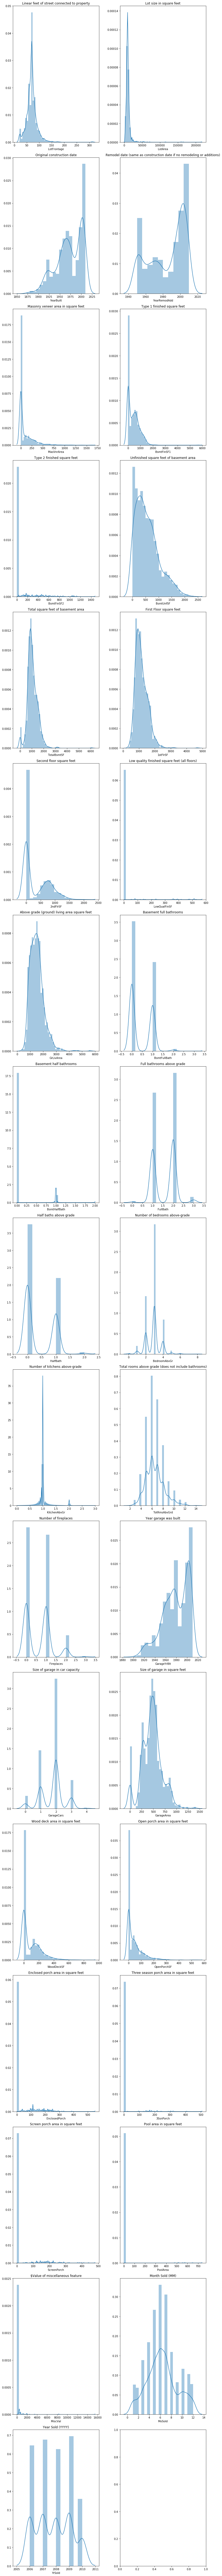

In [39]:
def plot_number_type_data(df, plot_function, ncols = 2, figsize_ratio=[6, 8]):
    nrows = math.ceil(df.shape[1] / ncols)
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(df):
        axes = ax[i]
        plot_function(df[cat], ax=axes)
        axes.set_title(column_desc[cat])
    
plot_number_type_data(number_type, sns.distplot)

Plot all variables about area of house parts:
* joined
* with log
* without zeros

In [80]:
def plot_number_type_data(df, plot_function, options=[], figsize_ratio=[6, 8]):
    ncols = len(options) + 1
    nrows = math.ceil(df.shape[1])
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    #reshaping ax when only one plot in row is needed
    if len(options) == 0:
        ax = ax.reshape([-1,1])
    
    for i, cat in enumerate(df):
        col_num = 0
        series = df[cat]
        plot_function(df[cat], ax=ax[i, 0], color="#9b59b6")
        ax[i, col_num].set_title(column_desc[cat])
        
        if 'zero_vals_cut' in options:
            col_num += 1
            plot_function(series[series != 0], ax=ax[i, 1], color="#3498db")
            ax[i, col_num].set_title(column_desc[cat] +' without zero values')
        if 'vals_log' in options:
            col_num += 1
            plot_function(np.log(series[series != 0]), ax=ax[i, 2], color="#e74c3c")
            ax[i, col_num].set_title('Logarithm of ' + column_desc[cat] +' without zero values')
            ax[i, col_num].set_xlabel(f'np.log({cat})')
         
   

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


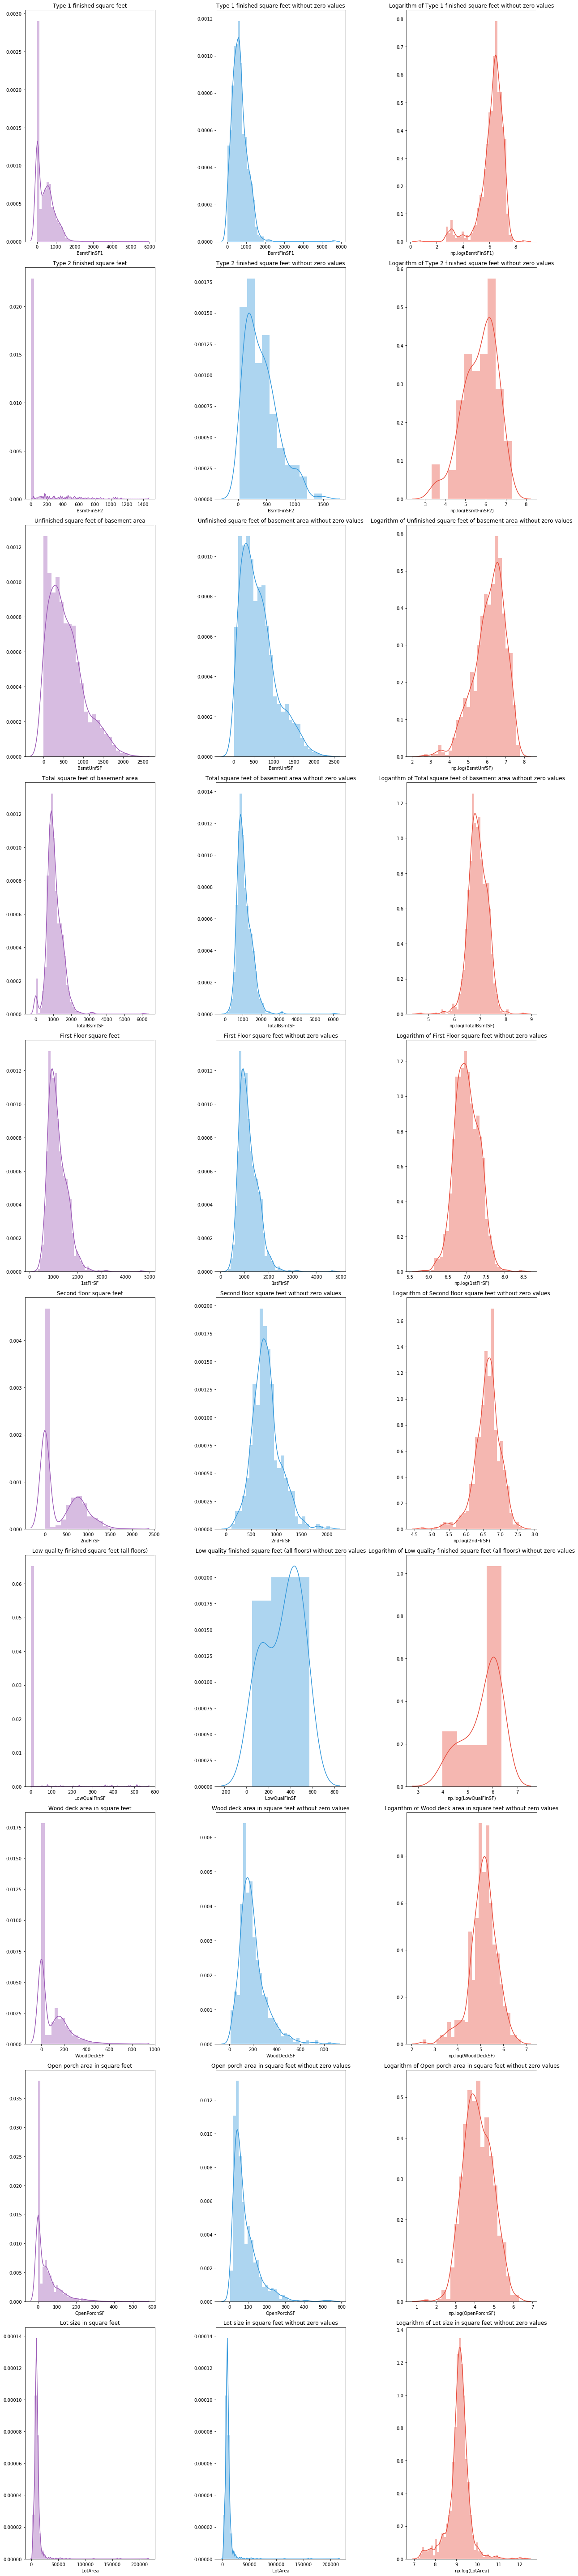

In [74]:
square_feet_columns = [s for s in list(number_type.columns) if 'sf' in s.lower()]
square_feet_columns.extend(['LotArea'])
df = train[square_feet_columns]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut', 'vals_log'])

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


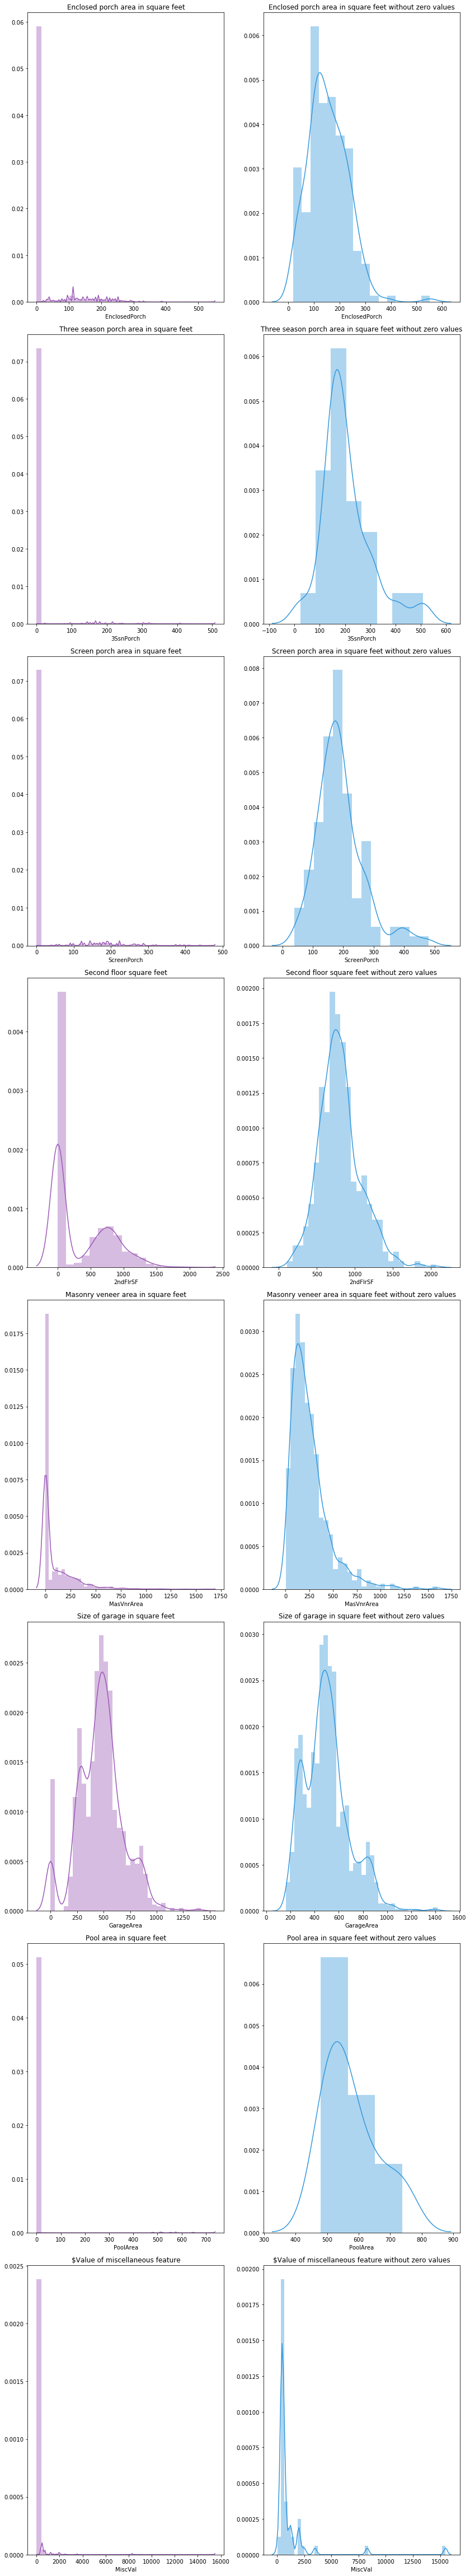

In [68]:
cols = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'PoolArea', 'MiscVal']
df = train[cols]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut'])

In [279]:
df = train.copy()
df['SalePrice'] = ytrain
df['cstperSFofLotArea'] = df.SalePrice / train.LotArea
df['cstperSFofLivingSpace'] = df.SalePrice / (df.TotalBsmtSF + df.GrLivArea)
# neighborhood_mean_price = list(df.groupby('Neighborhood').SalePrice.mean().sort_values().index)
neighborhood_mean_price_perSFofLotArea = df.groupby(by='Neighborhood').cstperSFofLotArea.mean().sort_values(ascending=False).index
neighborhood_mean_price_persfofLivingSpace = df.groupby(by='Neighborhood').cstperSFofLivingSpace.mean().sort_values(ascending=False).index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

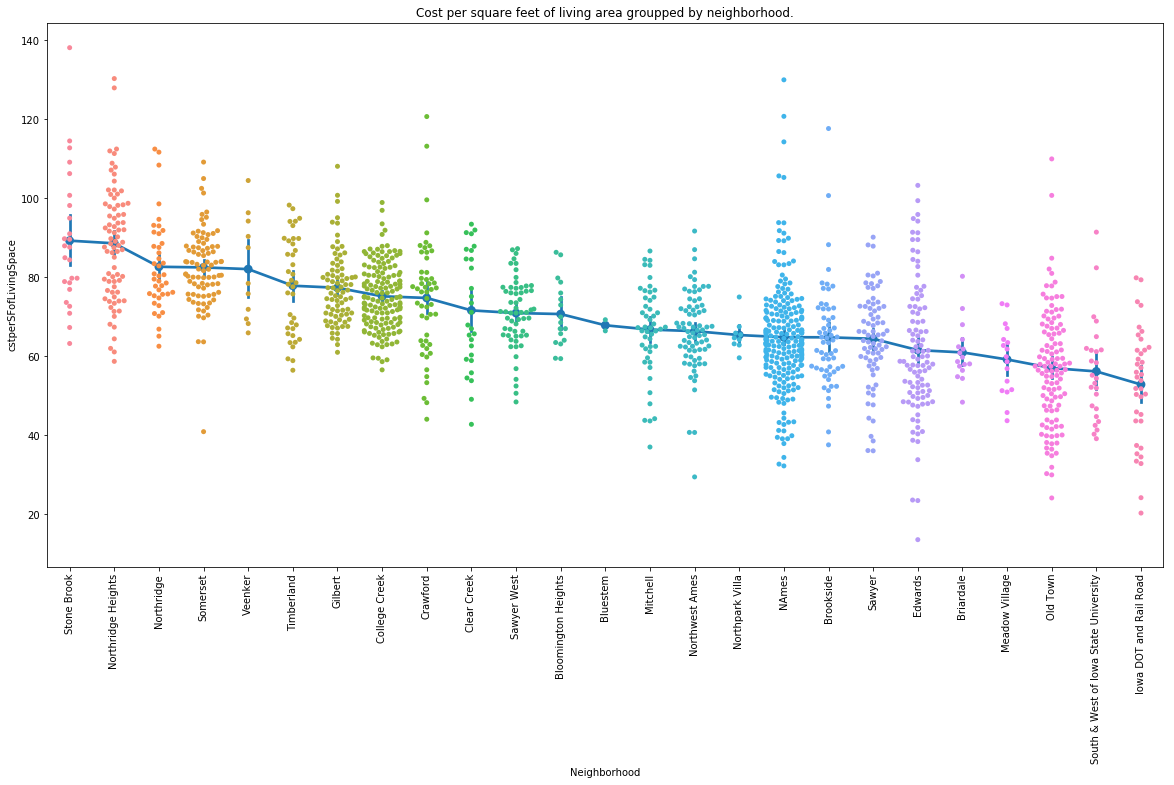

In [181]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
plt.xticks(rotation=90)
plt.title('Cost per square feet of living area groupped by neighborhood.')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

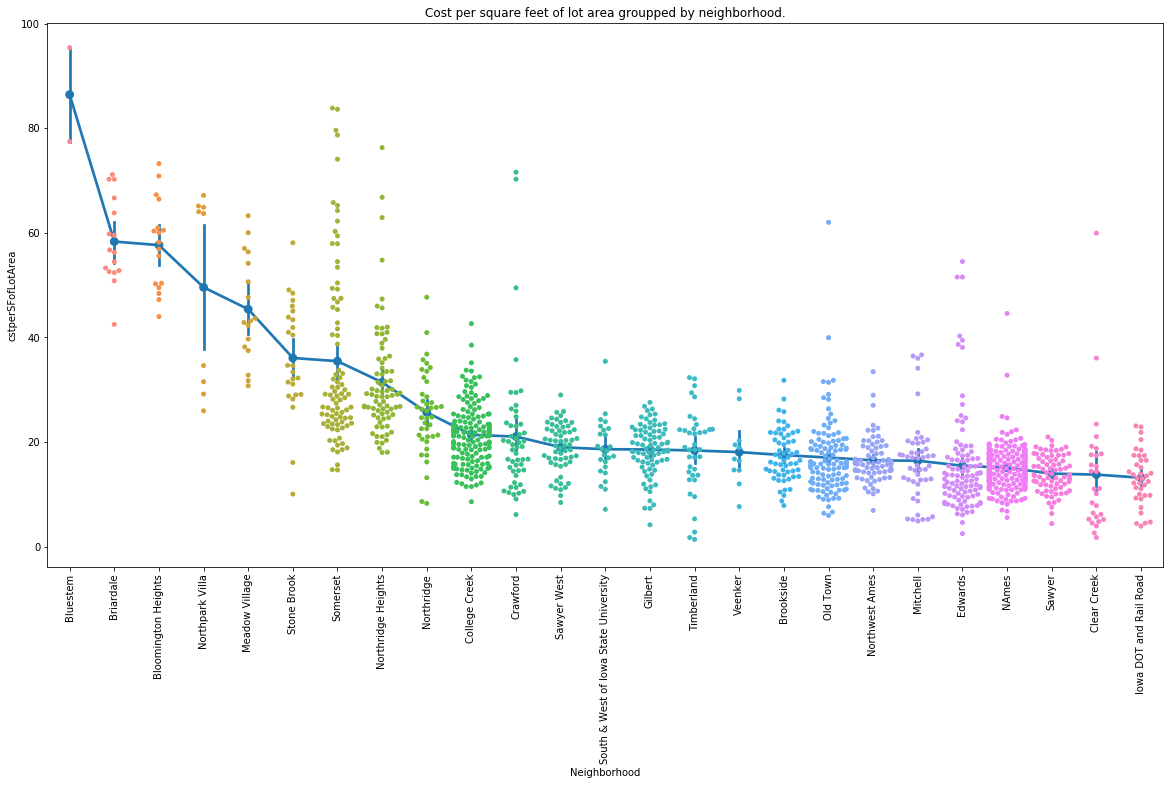

In [180]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
plt.xticks(rotation=90)
plt.title('Cost per square feet of lot area groupped by neighborhood.')

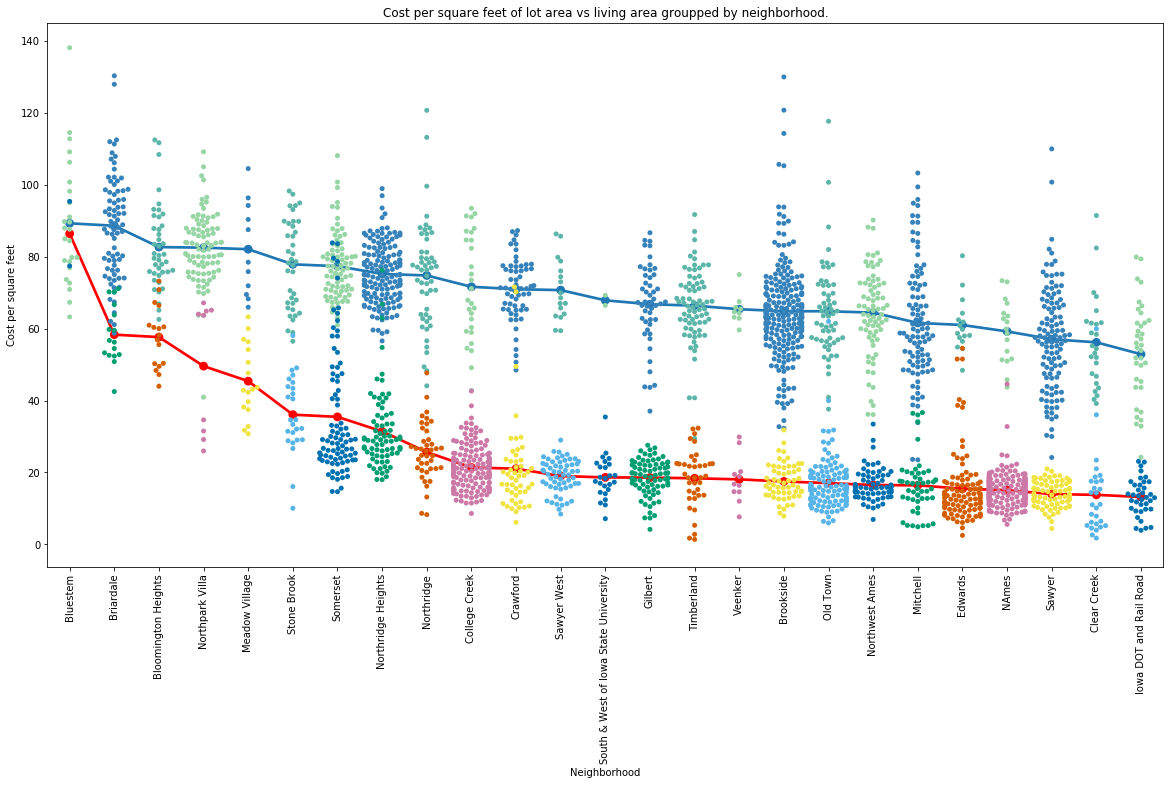

In [222]:
palette= [ '#96D5A4', '#3682BA', '#5BB6A9']

fig, ax = plt.subplots(figsize=[20,10])
_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace,
              palette=sns.color_palette(palette))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, errwidth=0)

_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea,
              palette=sns.color_palette("colorblind"))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', errwidth=0)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')

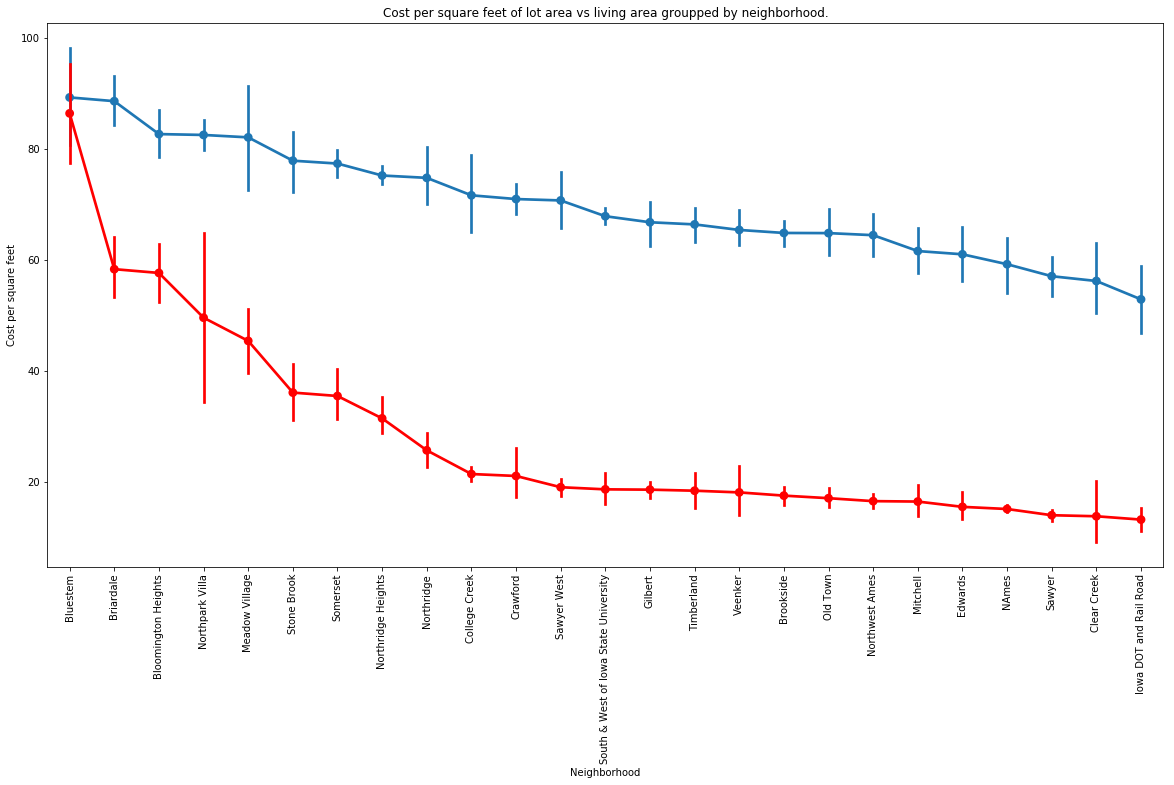

In [238]:
fig, ax = plt.subplots(figsize=[20,10])
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, ci=99)

_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', ci=99)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')


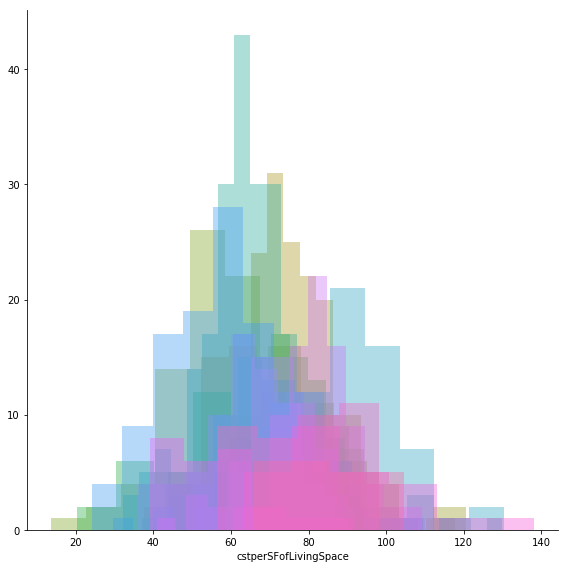

In [182]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'cstperSFofLivingSpace', kde=False)

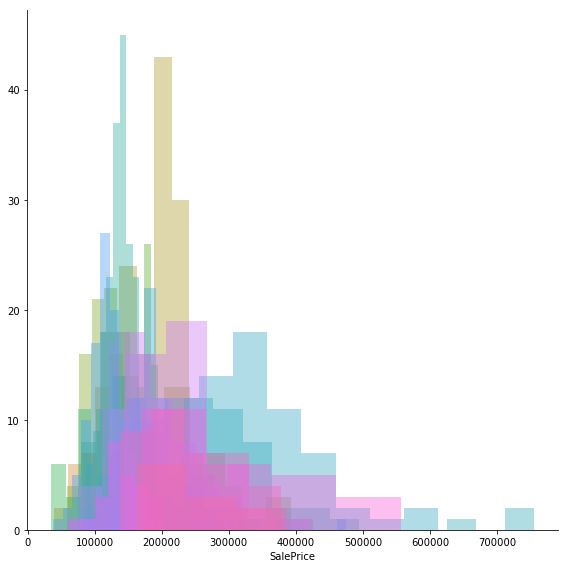

In [154]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'SalePrice', kde=False)

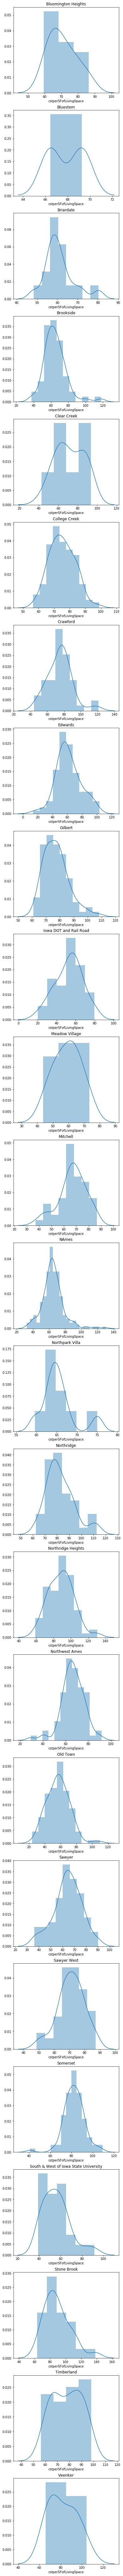

In [239]:
gr = df.groupby('Neighborhood')
nrows=len(gr)
fig, ax = plt.subplots(nrows=nrows, figsize=[6, nrows*6])
i=0
for name, vals in df.groupby('Neighborhood'):
    _ = sns.distplot(vals.cstperSFofLivingSpace, ax=ax[i])
    _ = ax[i].set_title(name)
    i+=1

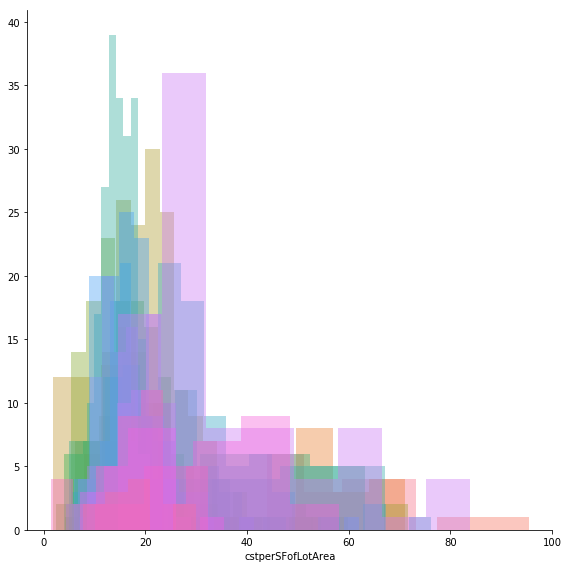

In [183]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'cstperSFofLotArea', kde=False)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


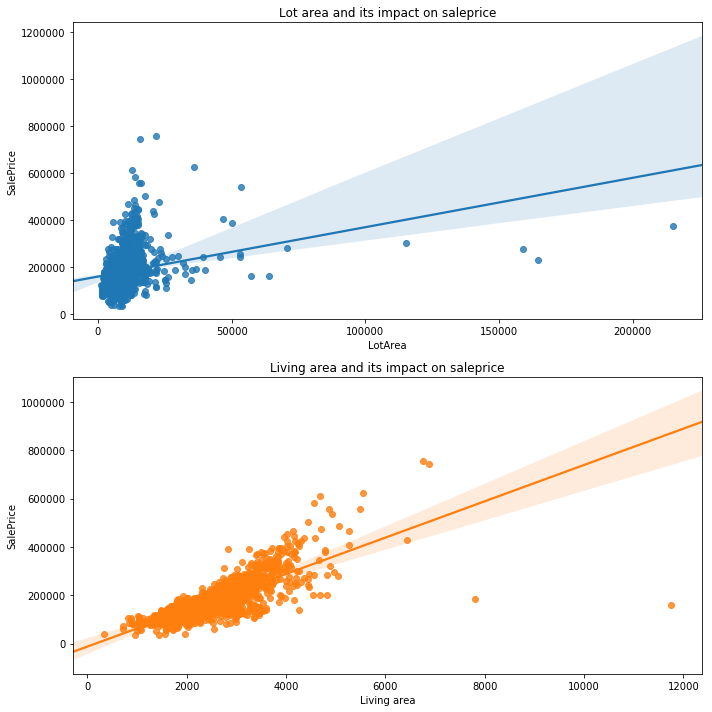

In [292]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10], tight_layout=True)
_ = sns.regplot(df.LotArea, df.SalePrice, ax=ax[0])
_ = ax[0].set_title('Lot area and its impact on saleprice')
_ = sns.regplot((df.TotalBsmtSF + df.GrLivArea), df.SalePrice, ax=ax[1])
_ = ax[1].set_title('Living area and its impact on saleprice')
_ = ax[1].set_xlabel('Living area')

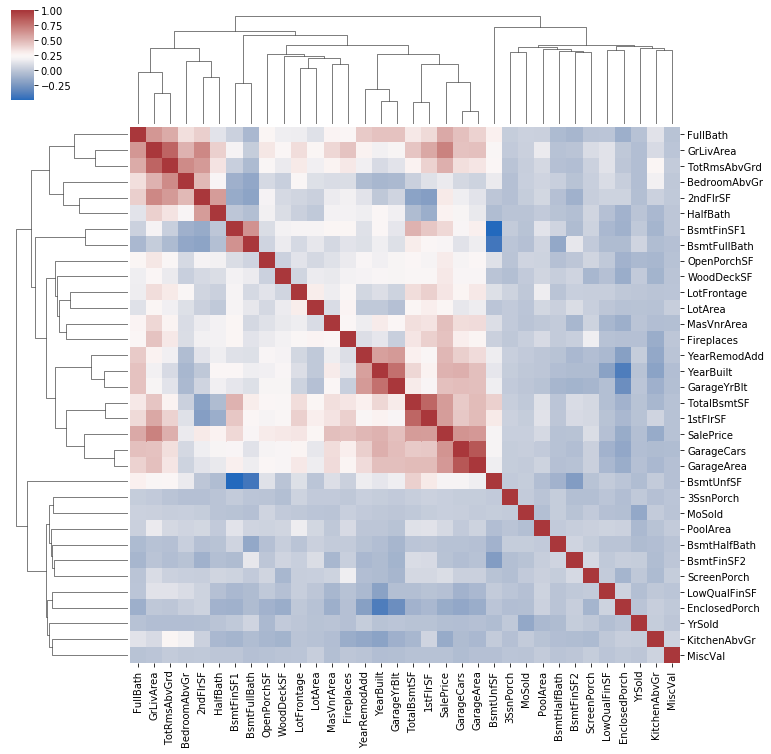

In [268]:
df = train.copy()
df['SalePrice'] = ytrain

sns.clustermap(df.corr(), cmap="vlag", figsize=[12,12])

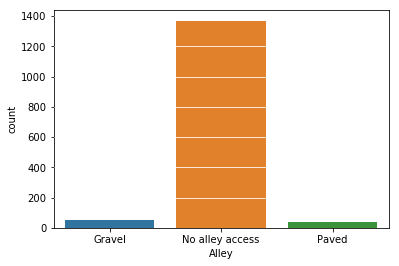

In [285]:
ax = sns.countplot(train.Alley)
ax.set_axisbelow(False)
ax.yaxis.grid(color='w', linestyle='solid')